### 2006 数学建模 B题：艾滋病疗法的评价及疗效的预测

In [1]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

from matplotlib import pyplot as plt

%matplotlib inline

In [2]:
data1 = pd.read_table("G:\\CnCqLeeds\\data\\B2006data\\data1.txt")

同时服用3种药物（zidovudine, lamivudine,indinavir）的300多名病人每隔几周测试的CD4和HIV的浓度。  
第1列是病人编号，第2列是测试CD4的时刻（周），第3列是测得的CD4（乘以0.2个/ml），第4列是测试HIV的时刻（周），第5列是测得的HIV（单位不详）


### 附件1中病人总数 共356人


In [11]:
data1.PtID.nunique()

356

In [39]:
data1.head(30)

,PtID,CD4Date,CD4Count,RNADate,VLoad
0,23424,0.0,178.0,0.0,5.5
1,23424,4.0,228.0,4.0,3.9
2,23424,8.0,126.0,8.0,4.7
3,23424,25.0,171.0,25.0,4.0
4,23424,40.0,99.0,40.0,5.0
5,23425,0.0,14.0,0.0,5.3
6,23425,4.0,62.0,4.0,2.4
7,23425,9.0,110.0,9.0,3.7
8,23425,23.0,122.0,23.0,2.6
9,23425,40.0,320.0,NaN,NaN


In [40]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1665 entries, 0 to 1664
Data columns (total 5 columns):
PtID        1665 non-null int64
CD4Date     1662 non-null float64
CD4Count    1662 non-null float64
RNADate     1572 non-null float64
VLoad       1572 non-null float64
dtypes: float64(4), int64(1)
memory usage: 65.1 KB


In [62]:
count_data = data1.groupby(by='CD4Date').count()

In [63]:
count_data[count_data.PtID>10]

,PtID,CD4Count,RNADate,VLoad
CD4Date,,,,
0.0,336,336,334,334
1.0,14,14,13,13
3.0,53,53,52,52
4.0,231,231,228,228
5.0,61,61,60,60
6.0,11,11,10,10
7.0,61,61,60,60
8.0,208,208,203,203
9.0,64,64,63,63


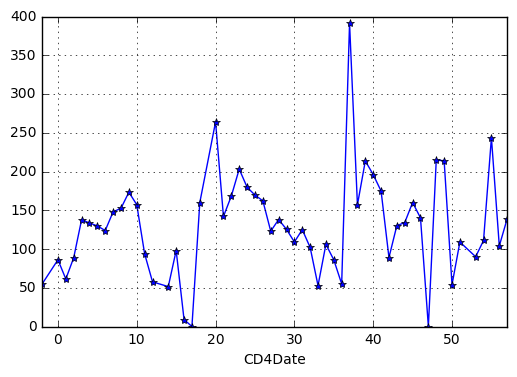

In [36]:

mean_CD4_by_date = data1.groupby(by='CD4Date').CD4Count.mean()
mean_CD4_by_date.plot(marker='*',grid=True)


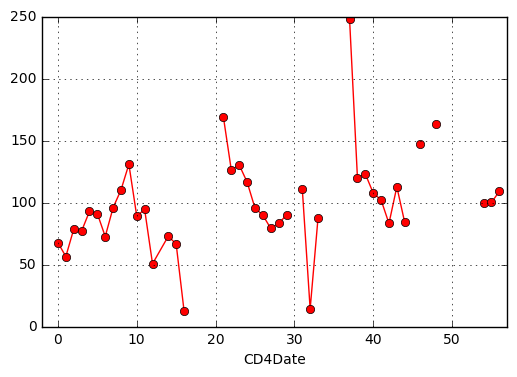

In [37]:
std_CD4_by_date = data1.groupby(by='CD4Date').CD4Count.std()
std_CD4_by_date.plot(marker='o',c='red', grid=True)

In [4]:
columns = ['ID','Method','Age','Time','Log_CD4']
data2 = pd.read_table("G:\\CnCqLeeds\\data\\B2006data\\data2.txt",\
                      header=None)
data2.columns = columns

1300多名病人按照4种疗法服药大约每隔8周测试的CD4浓度。

第1列是病人编号，第2列是4种疗法的代码：
1 = 600mg zidovudine 与400mg didanosine按月轮换使用；
2 = 600mg zidovudine 加2.25mg zalcitabine；
3 = 600mg zidovudine 加400mg didanosine；
4 = 600mg zidovudine 加400mg didanosine 加400mg nevirapine。

第3列是病人年龄，第4列是测试CD4的时刻（周），第5列是测得的CD4，取值log(CD4+1).

### 附件2中病人总数 1309人

In [12]:
data2.ID.nunique()

1309

In [5]:
data2.head()

,ID,Method,Age,Time,Log_CD4
0,1,2,36.4271,0.0000,3.1355
1,1,2,36.4271,7.5714,3.0445
2,1,2,36.4271,15.5714,2.7726
3,1,2,36.4271,23.5714,2.8332
4,1,2,36.4271,32.5714,3.2189


In [6]:
data1.shape

(1665, 5)

In [7]:
data2.shape

(5036, 5)

In [9]:
data1.PtID.nunique()

356

In [10]:
data2.ID.nunique()

1309